In [1]:
import pandas as pd
import numpy as np
import h5py
from PIL import Image
import os
import cv2
import random
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from tqdm import tqdm
from tensorflow import keras

In [2]:
INPUT_DIR = 'data/raw/blocks_25/'
TO_IGNORE = 'ND8_DIV0+2h_3_ch_4'
RESIZE = 51
CROP_SIZE = 38
IMG_SIZE = 38
CHANNELS = 3
N_categories = 5


In [11]:
def count(l,n):
    count = [0 for _ in range(n)]
    for i in range(n):
        count[i] = l.count(i)
    return count
def getCategory(name):
    for i,elm in enumerate(block_annotation[0]):
        if elm ==name :
            return block_annotation[1][i]
    return -1

def one_hot_n(x,n):
    arr = [0 for _ in range(n)]
    arr[x] = 1
    return np.array(arr);

def one_hot(x):
    return one_hot_n(x,N_categories)

# def create_training_data_with_limit(limit,n):
#     totals = [0 for _ in range(n)]
#     for file in tqdm(os.listdir(INPUT_DIR)):
#         try:
#             class_num = getCategory(file)
#             if class_num == -1 :
#                 continue
#             if totals[class_num]>=limit:
#                 continue
#             file_path = INPUT_DIR+file
#             img = cv2.imread(file_path, cv2.IMREAD_COLOR)
#             new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#             training_data.append([new_array,class_num])
#             totals[class_num] = totals[class_num] + 1
#         except Exception as e:
#             print(e)
            
def create_training_data_with_limit(maxs,n):
    totals = [0 for _ in range(n)]
    dif = RESIZE - CROP_SIZE
    x1 = int(dif/2)
    x2 = int(RESIZE - dif/2)
    
    for file in tqdm(os.listdir(INPUT_DIR)):
        try:
            class_num = getCategory(file)
            if class_num == -1 :
                continue
            if totals[class_num]>=maxs[class_num]:
                continue
            file_path = INPUT_DIR+file
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)
            new_array = cv2.resize(img, (RESIZE, RESIZE))
            im = new_array[x1:x2, x1:x2]
            training_data.append([im,class_num])
            totals[class_num] = totals[class_num] + 1
        except Exception as e:
            print(e)
    print("Totals: ",totals)
            
def create_training_data():
    training_data = []
    totals = [0 for _ in range(N_categories)]
    dropped = 0
    for file in tqdm(os.listdir(INPUT_DIR)):
        if TO_IGNORE in file:
            print("To ignore: ",file)
            continue
        try:
            class_num = getCategory(file)
            if class_num > -1 :
                file_path = INPUT_DIR+file
                img = cv2.imread(file_path, cv2.IMREAD_COLOR)
                if img.shape[0] != RESIZE or img.shape[1] != RESIZE :
                    dropped = dropped +1
                    print("Dropped  ", str(img.shape[0]),"-",str(img.shape[1]), "  ",str(dropped))
                else:
#                 new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    training_data.append([img,class_num])
                    totals[class_num] = totals[class_num]+1
        except Exception as e:
            print(e)
    return training_data,totals,dropped

In [12]:
block_annotation = pd.read_csv('data/raw/block_annotation2.csv',header=None)
print("Shape: ",block_annotation.shape)
totals = count(block_annotation[1].tolist(),N_categories)
print("Totals: ",totals)
Threshold = min(totals)
print("Threshold: ",Threshold)
block_annotation.head()

Shape:  (2282, 2)
Totals:  [301, 493, 531, 329, 628]
Threshold:  301


,0,1
0,ND8_DIV0+4h_20x_noConfinment_6_ch_4_30.tif,2
1,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_32_...,4
2,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_31_...,4
3,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_28_...,4
4,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_10_...,0


In [13]:
MAXS = [301, 493, 531, 329, 628]

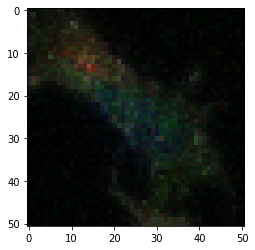

(51, 51, 3)
-1
[0 0 0 0 1]


In [14]:
example = '20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_16_ch_4_54.tif'
path_example = INPUT_DIR + example
img = cv2.imread(path_example, cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()
print(img.shape)
x = getCategory(example)
print(x)
print(one_hot(x))

In [15]:

# dropped = 0
# create_training_data_with_limit(MAXS, N_categories)
training_data , totals, dropped = create_training_data()
len(training_data)

  9%|▉         | 716/7983 [00:00<00:02, 3566.22it/s]

To ignore:  ND8_DIV0+2h_3_ch_4_31.tif
Dropped   51 - 47    1
Dropped   41 - 51    2
Dropped   51 - 48    3
Dropped   51 - 49    4
Dropped   34 - 51    5
Dropped   51 - 39    6
To ignore:  ND8_DIV0+2h_3_ch_4_6.tif
Dropped   51 - 50    7
Dropped   51 - 49    8
Dropped   51 - 49    9
To ignore:  ND8_DIV0+2h_3_ch_4_24.tif
Dropped   51 - 46    10
To ignore:  ND8_DIV0+2h_3_ch_4_25.tif
To ignore:  ND8_DIV0+2h_3_ch_4_14.tif


 18%|█▊        | 1459/7983 [00:00<00:01, 3635.17it/s]

Dropped   44 - 51    11
Dropped   44 - 51    12
Dropped   35 - 51    13
Dropped   35 - 51    14
Dropped   51 - 49    15
To ignore:  ND8_DIV0+2h_3_ch_4_3.tif
To ignore:  ND8_DIV0+2h_3_ch_4_33.tif
To ignore:  ND8_DIV0+2h_3_ch_4_22.tif
To ignore:  ND8_DIV0+2h_3_ch_4_20.tif
Dropped   32 - 51    16
Dropped   51 - 39    17


 28%|██▊       | 2208/7983 [00:00<00:01, 3687.54it/s]

To ignore:  ND8_DIV0+2h_3_ch_4_19.tif
Dropped   46 - 51    18
To ignore:  ND8_DIV0+2h_3_ch_4_17.tif
To ignore:  ND8_DIV0+2h_3_ch_4_10.tif
Dropped   51 - 48    19
Dropped   42 - 51    20
To ignore:  ND8_DIV0+2h_3_ch_4_1.tif
Dropped   51 - 41    21
To ignore:  ND8_DIV0+2h_3_ch_4_29.tif
Dropped   45 - 51    22
Dropped   51 - 42    23
To ignore:  ND8_DIV0+2h_3_ch_4_12.tif


 37%|███▋      | 2953/7983 [00:00<00:01, 3708.59it/s]

To ignore:  ND8_DIV0+2h_3_ch_4_4.tif
Dropped   39 - 51    24
Dropped   51 - 39    25
Dropped   51 - 40    26
Dropped   51 - 37    27
Dropped   41 - 51    28
Dropped   34 - 51    29
Dropped   47 - 51    30
To ignore:  ND8_DIV0+2h_3_ch_4_32.tif
Dropped   50 - 51    31
Dropped   51 - 48    32
Dropped   51 - 45    33


 46%|████▌     | 3675/7983 [00:01<00:01, 3663.30it/s]

Dropped   51 - 39    34
Dropped   47 - 51    35
Dropped   51 - 48    36
Dropped   51 - 43    37
Dropped   51 - 38    38
Dropped   49 - 51    39
To ignore:  ND8_DIV0+2h_3_ch_4_5.tif
Dropped   51 - 42    40
To ignore:  ND8_DIV0+2h_3_ch_4_23.tif
To ignore:  ND8_DIV0+2h_3_ch_4_2.tif
Dropped   44 - 51    41
Dropped   51 - 41    42
Dropped   51 - 38    43


 60%|█████▉    | 4750/7983 [00:01<00:00, 3482.98it/s]

Dropped   51 - 40    44
To ignore:  ND8_DIV0+2h_3_ch_4_11.tif
To ignore:  ND8_DIV0+2h_3_ch_4_30.tif
Dropped   51 - 42    45
Dropped   51 - 39    46
Dropped   40 - 51    47
To ignore:  ND8_DIV0+2h_3_ch_4_7.tif
Dropped   39 - 51    48
Dropped   44 - 51    49
Dropped   51 - 39    50
To ignore:  ND8_DIV0+2h_3_ch_4_0.tif
Dropped   43 - 51    51
Dropped   51 - 40    52


 69%|██████▊   | 5472/7983 [00:01<00:00, 3527.34it/s]

Dropped   51 - 45    53
Dropped   51 - 50    54
Dropped   51 - 36    55
Dropped   39 - 51    56
To ignore:  ND8_DIV0+2h_3_ch_4_15.tif
Dropped   49 - 51    57
Dropped   39 - 51    58
Dropped   51 - 40    59
Dropped   51 - 43    60
Dropped   51 - 48    61
Dropped   51 - 40    62
Dropped   51 - 48    63


 78%|███████▊  | 6205/7983 [00:01<00:00, 3602.65it/s]

Dropped   51 - 37    64
Dropped   51 - 46    65
Dropped   51 - 43    66
Dropped   51 - 45    67
Dropped   43 - 51    68
To ignore:  ND8_DIV0+2h_3_ch_4_21.tif
Dropped   51 - 39    69
To ignore:  ND8_DIV0+2h_3_ch_4_18.tif


 87%|████████▋ | 6953/7983 [00:01<00:00, 3668.03it/s]

To ignore:  ND8_DIV0+2h_3_ch_4_16.tif
Dropped   51 - 41    70
Dropped   43 - 51    71
Dropped   51 - 41    72
To ignore:  ND8_DIV0+2h_3_ch_4_28.tif
Dropped   51 - 36    73
To ignore:  ND8_DIV0+2h_3_ch_4_13.tif
Dropped   50 - 51    74
Dropped   51 - 45    75
Dropped   51 - 36    76


 96%|█████████▋| 7697/7983 [00:02<00:00, 3680.84it/s]

Dropped   51 - 46    77
Dropped   37 - 51    78
To ignore:  ND8_DIV0+2h_3_ch_4_9.tif
To ignore:  ND8_DIV0+2h_3_ch_4_26.tif
Dropped   42 - 51    79
Dropped   51 - 40    80
To ignore:  ND8_DIV0+2h_3_ch_4_34.tif
Dropped   44 - 51    81
Dropped   37 - 51    82
Dropped   51 - 47    83
Dropped   51 - 44    84
To ignore:  ND8_DIV0+2h_3_ch_4_27.tif
To ignore:  ND8_DIV0+2h_3_ch_4_8.tif
Dropped   51 - 41    85
Dropped   51 - 44    86
Dropped   51 - 46    87
Dropped   51 - 49    88
Dropped   51 - 50    89
Dropped   51 - 39    90
Dropped   34 - 51    91


100%|██████████| 7983/7983 [00:02<00:00, 3624.15it/s]

Dropped   51 - 35    92


2174

In [22]:
print(totals)
print(sum(totals))
print(dropped)

[286, 459, 512, 317, 600]
2174
92


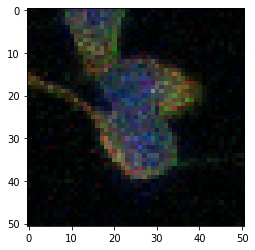

(51, 51, 3)
3


In [23]:
plt.imshow(training_data[2][0])
plt.show()
print(training_data[2][0].shape)
# x = getCategory(name)
print(training_data[2][1])

In [26]:
random.shuffle(training_data)

In [27]:
import pickle

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,51,51,3)
y = np.array(y).reshape(-1,1)



pickle_out = open("data/X2_clean.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("data/y2_clean.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

print(X.shape) 
print(y.shape)

(2174, 51, 51, 3)
(2174, 1)
